In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [5]:
# Create a Pandas DataFrame with data for part 1

# The data elements are [V, dV, x_inches, dx_inches]

data2 = [[38.642,0.001,0.00,5.0], [38.709,0.001,90.0,5.0], [38.877,0.001,180.0,5.0], 
         [39.042,0.001,270.0,5.0]]
# create dataframe
df2 = pd.DataFrame(data2, columns = ['Time', 'dTime','AngleD','dAngleD'])

print(df2.to_string(index=False))

   Time  dTime  AngleD  dAngleD
 38.642  0.001     0.0      5.0
 38.709  0.001    90.0      5.0
 38.877  0.001   180.0      5.0
 39.042  0.001   270.0      5.0


In [6]:
df2['Angle'] = df2['AngleD']*3.14159265/180.0
df2['dAngle'] = df2['dAngleD']*3.14159265/180.0
df2

,Time,dTime,AngleD,dAngleD,Angle,dAngle
0,38.642,0.001,0.0,5.0,0.000000,0.087266
1,38.709,0.001,90.0,5.0,1.570796,0.087266
2,38.877,0.001,180.0,5.0,3.141593,0.087266
3,39.042,0.001,270.0,5.0,4.712389,0.087266


Beta: [  11.13807311 -429.99595839]
Beta Std Error: [ 1.39577961 54.18110813]
Beta Covariance: [[ 8.01928279e-02 -3.11288506e+00]
 [-3.11288506e+00  1.20836350e+02]]
Residual Variance: 24.29395201201448
Inverse Condition #: 0.00010050641666950828
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (11.138073108 +/- 1.395779607) X + (-429.995958386 +/- 54.181108130)


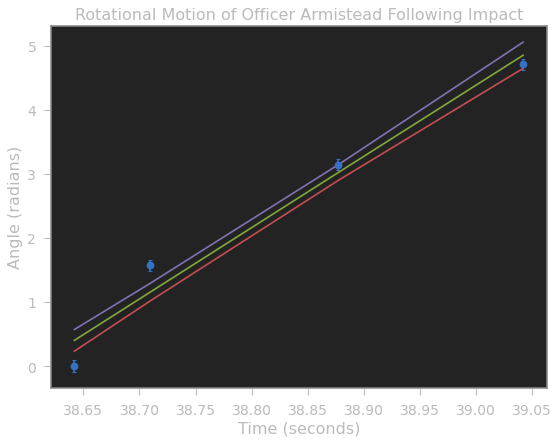

In [7]:
xi = df2['Time']
yi = df2['Angle']
sigmaxi = df2['dTime']
sigmayi = df2['dAngle']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (radians)')
plt.title('Rotational Motion of Officer Armistead Following Impact')
plt.show()

In [8]:
print(popt[0]*30/3.14159265,perr[0]*30/3.14159265)
omega = popt[0]*30/3.14159265
domega = perr[0]*30/3.14159265

106.36076362182081 13.328713452904232


In [9]:
I = 1.8
dI = 0.5

R = 0.5*I*omega**2
dR = R * (dI/I + 2.0*domega/omega)

print (R,dR)

Radius = 0.5
dRadius = 0.15

Impulse = omega*I/Radius
dImpulse = Impulse*(domega/omega + dI/I + dRadius/Radius)

print (Impulse,dImpulse)

10181.350834395158 5379.926863259405
382.8987490385549 269.2137567638425
